In [6]:
# para la manipulación y el análisis de datos
import pandas as pd

# para funciones matemáticas de alto rendimiento
import numpy as np

# para crear visualizaciones estáticas, animadas e interactivas
import matplotlib.pyplot as plt

# para crear gráficos estadísticos atractivos e informativos
import seaborn as sns

# para comprobar si todas las bibliotecas se importaron correctamente o no
print("Bien importado!")

Bien importado!


In [8]:
# cargando base de datos
traffic = pd.read_csv('/home/lean/DATA_SETS/website_wata.csv')

# comprobar si se ha cargado
print("Base de datos cargada!")

Base de datos cargada!


In [10]:
# explorando las primeras 5 filas.
traffic.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [12]:
# explorando las ultimas 5 filas.
traffic.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


In [14]:
# se realiza una descripción estadistica de la base de datos.
traffic.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [18]:
# se examina la forma.
traffic.shape

(2000, 7)

In [20]:
# Información básica
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [22]:
# encontrando valores nulos.
traffic.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [26]:
# examinando valores únicos.
traffic.nunique()

Page Views            15
Session Duration    2000
Bounce Rate         2000
Traffic Source         5
Time on Page        2000
Previous Visits       10
Conversion Rate      228
dtype: int64

In [30]:
# Búsqueda del valor de recuento '1.0' en la columna TASA DE CONVERSIÓN
con_count = traffic['Conversion Rate'].value_counts().get(1.0, 0)

# devolución.
con_count

1773

In [32]:
#creando un nuevo conjunto de datos sin datos categóricos.
traffic_num = traffic.drop('Traffic Source', axis=1)

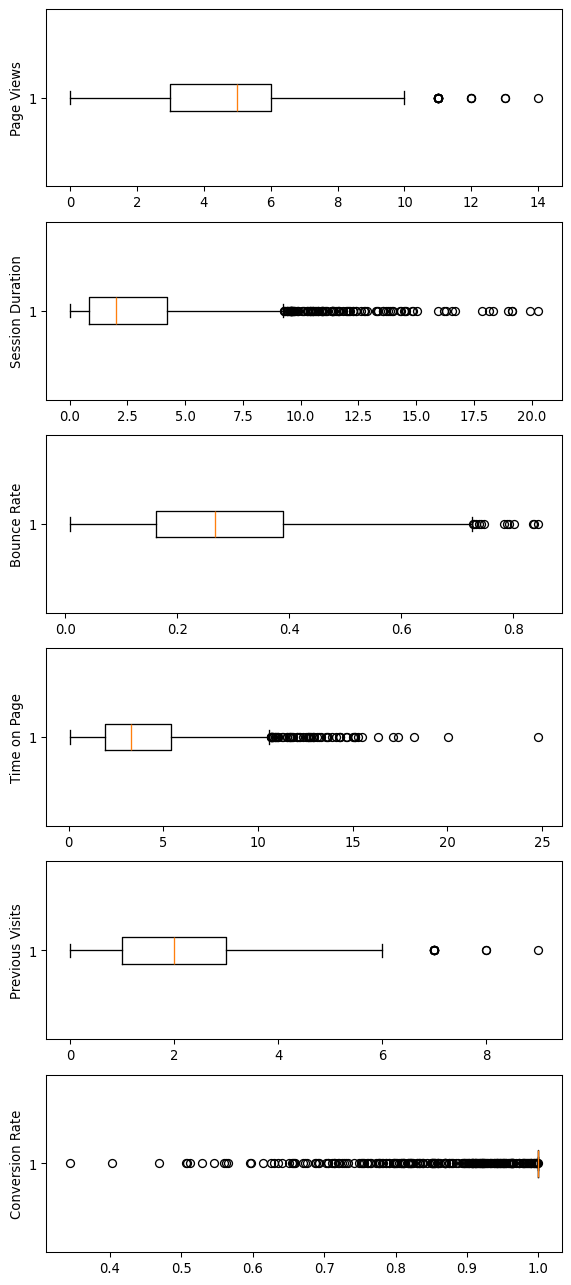

In [34]:
# diagrama de cajas.
fig, axs = plt.subplots(6,1,dpi=95, figsize=(7,17))
i = 0
for col in traffic_num.columns:
	axs[i].boxplot(traffic_num[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

In [38]:
# COLUMNA: Page Views.

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Page Views'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Page Views'] >= lower_bound) & (traffic['Page Views'] <= upper_bound)]



# COLUMNA: Session Duration

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Session Duration'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Session Duration'] >= lower_bound) & (traffic['Session Duration'] <= upper_bound)]


# COLUMNA: Bounce Rate

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Bounce Rate'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Bounce Rate'] >= lower_bound) & (traffic['Bounce Rate'] <= upper_bound)]



# COLUMNA: Time on Page

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Time on Page'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Time on Page'] >= lower_bound) & (traffic['Time on Page'] <= upper_bound)]



# COLUMNA: Previous Visits

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Previous Visits'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Previous Visits'] >= lower_bound) & (traffic['Previous Visits'] <= upper_bound)]



# COLUMNA: Conversion Rate

# identificando cuartiles.
q1, q3 = np.percentile(traffic['Conversion Rate'], [25, 75])

# calculando el rango intercuartil.
iqr = q3 - q1

# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# eliminar los valores atípicos por filtrado.
traffic_clean = traffic[(traffic['Conversion Rate'] >= lower_bound) & (traffic['Conversion Rate'] <= upper_bound)]


# comprobando que se han filtrado los datos atipicos.
print("datos atipicos filtrados con exito!")


datos atipicos filtrados con exito!


In [40]:
# eliminando columna con datos categoricos.
traffic_clean_num = traffic_clean.drop('Traffic Source', axis=1)

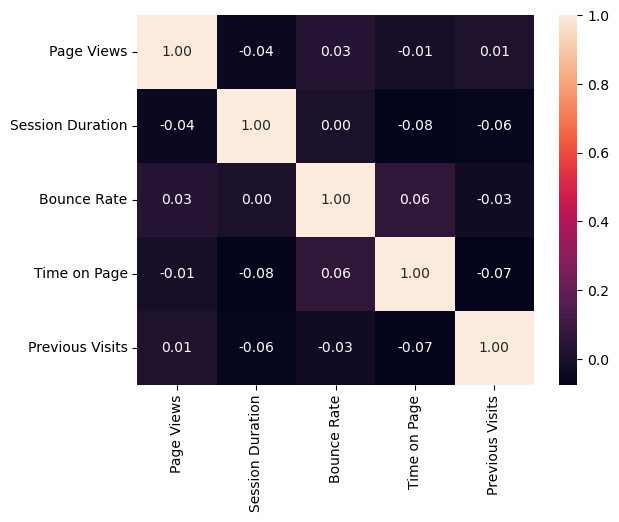

In [42]:
# Crear diagrama de calor y eliminar la columna CONVERSION RATE creating a heatmap and dropping CONVERSION RATE por que no se puede visualizar.
corr = traffic_clean_num.drop('Conversion Rate', axis=1).corr()
plt.figure(dpi=100)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

In [44]:
# examinando los valores de TRAFFIC SOURCE
traffic_counts = traffic_clean['Traffic Source'].value_counts()
traffic_counts = traffic_clean['Traffic Source'].value_counts()

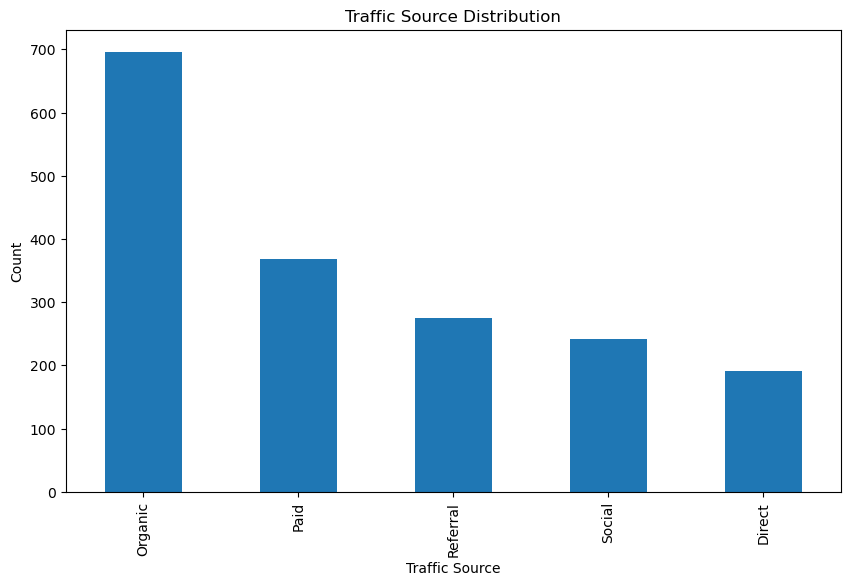

In [48]:
# creando grafico de barras con la distribución de TRAFFIC SOURCE.
traffic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.show()

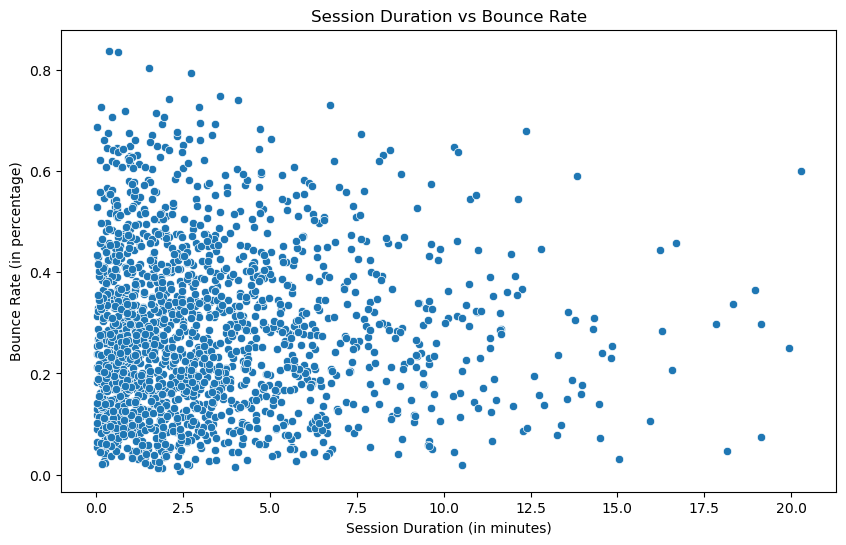

In [52]:
# creando grafico de dispersión entre la relación de Session Duration y Bounce Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session Duration', y='Bounce Rate', data=traffic_clean_num)
plt.title('Session Duration vs Bounce Rate')
plt.xlabel('Session Duration (in minutes)')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()

In [54]:
#Relación entre  Page Views y Session Duration.
# Creando nuevas variables para visualizar los datos.
page_views = traffic_clean_num['Page Views']
session_duration = traffic_clean_num['Session Duration']

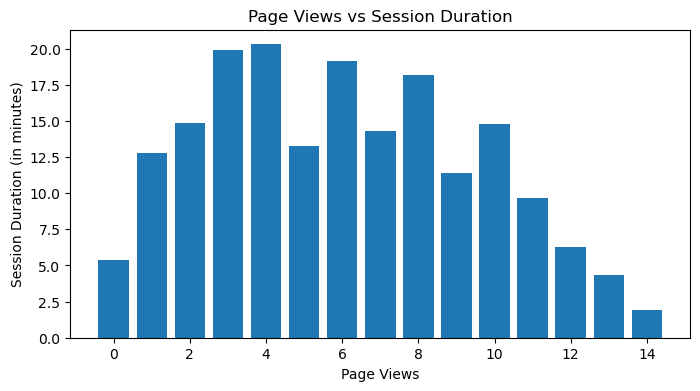

In [56]:
#creando grafico de barras.
plt.figure(figsize=(8, 4))
plt.bar(page_views, session_duration)
plt.title('Page Views vs Session Duration')
plt.xlabel('Page Views')
plt.ylabel('Session Duration (in minutes)')
plt.show()

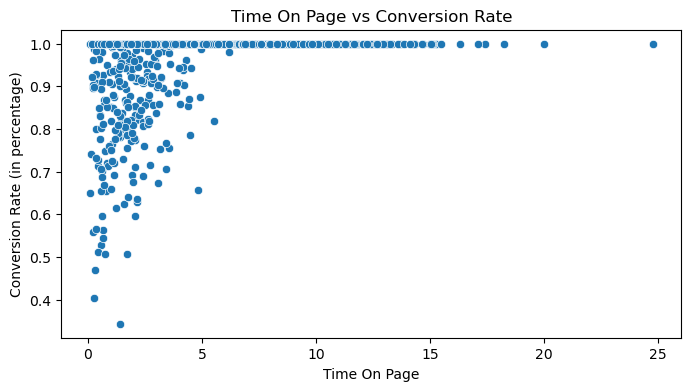

In [58]:
#Relación entre Time On Page y Conversion Rate.
# creando grafico de dispersión.
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Conversion Rate', data=traffic)
plt.title('Time On Page vs Conversion Rate')
plt.xlabel('Time On Page')
plt.ylabel('Conversion Rate (in percentage)')
plt.show()

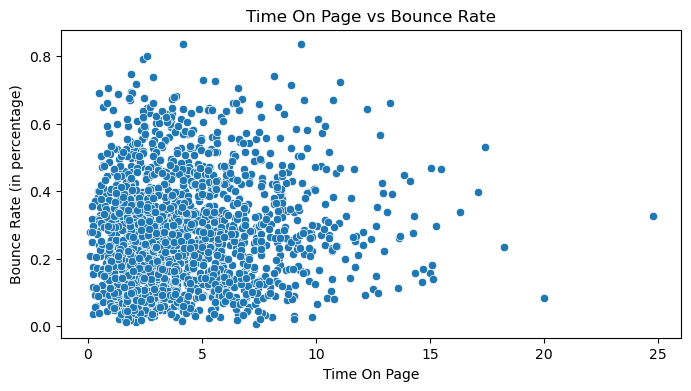

In [60]:
# Relación entre Time On Page And Bounce Rate.
# Creando grafico de dispersión.
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Bounce Rate', data=traffic_clean_num)
plt.title('Time On Page vs Bounce Rate')
plt.xlabel('Time On Page')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()